In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
studperf_df=pd.read_csv('StudentsPerformance.csv')
studperf_df.info()
studperf_df.info(verbose=False) # short summary
studperf_df.describe()
print(studperf_df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  774 non-null    object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   mathscore                    1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 8 entries, gender to writing score
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
    gender race/ethnicity parental level of education         lunch  \
0   female        group B          

In [17]:
#Remove unnecessary features (E.g. drop unwanted columns) from the dataset such as ‘lunch’and ‘test preparation course’
stuperf_df = studperf_df.drop(['lunch'], axis=1,inplace = False)
print('\\n====Understanding Inplace False : The Copied Dataframe====')
print(stuperf_df.head(3))

\n====Understanding Inplace False : The Copied Dataframe====
   gender race/ethnicity parental level of education test preparation course  \
0  female        group B           bachelor's degree                    none   
1  female        group C                         NaN               completed   
2  female        group B             master's degree                    none   

   mathscore  reading score  writing score  
0         72             72             74  
1         69             90             88  
2         90             95             93  


In [18]:
#Manipulate data by replacing empty column values in ‘parental level of education’ with adefault value.
stuperf_df["parental level of education"] =stuperf_df["parental level of education"].fillna("Not applicable")
print(stuperf_df.head(5))
print(stuperf_df.head(5))

   gender race/ethnicity parental level of education test preparation course  \
0  female        group B           bachelor's degree                    none   
1  female        group C              Not applicable               completed   
2  female        group B             master's degree                    none   
3    male        group A          associate's degree                    none   
4    male        group C              Not applicable                    none   

   mathscore  reading score  writing score  
0         72             72             74  
1         69             90             88  
2         90             95             93  
3         47             57             44  
4         76             78             75  
   gender race/ethnicity parental level of education test preparation course  \
0  female        group B           bachelor's degree                    none   
1  female        group C              Not applicable               completed   
2  female

In [19]:
#Convert the attribute ‘race/ethnicity’ to have ‘groupA’ to be ‘Asian Students’,‘groupB’ to be ‘African Students’ ,
#‘groupC’ to be ‘Afro-Asian #Students’, ‘groupD’ to be ‘American Students’and ‘groupE’ to be ‘European Students’
stuperf_df["race/ethnicity"]=stuperf_df["race/ethnicity"].map({
    "group A" : "Asian students",
    "group B" : "African students",
    "group C" : "Afro-Asian students",
    "group D" : "American students",
    "group E" : "European students"})
print(stuperf_df.head(2))

   gender       race/ethnicity parental level of education  \
0  female     African students           bachelor's degree   
1  female  Afro-Asian students              Not applicable   

  test preparation course  mathscore  reading score  writing score  
0                    none         72             72             74  
1               completed         69             90             88  


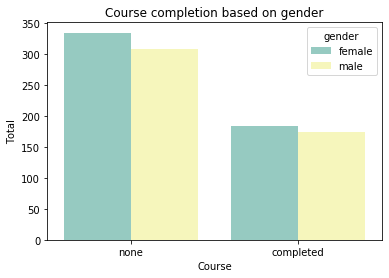

In [20]:
#Tally of the Number of Male & Female students who took up the ‘test preparation course’ and those who did not.
ax = sns.countplot(x="test preparation course",hue='gender',palette='Set3',data=stuperf_df)
ax.set(title="Course completion based on gender", xlabel='Course', ylabel='Total')
plt.show()

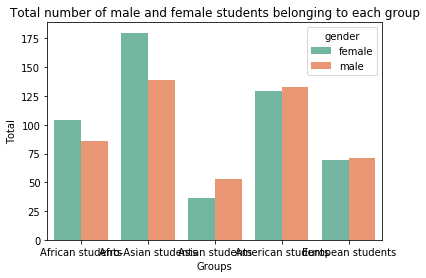

In [21]:
#Total Number of Male & Female Students belonging to each student group
ax = sns.countplot(x="race/ethnicity",hue="gender",palette="Set2",data=stuperf_df)
ax.set(title="Total number of male and female students belonging to each group",xlabel="Groups", ylabel="Total")
plt.show()

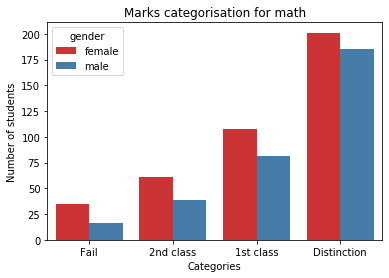

In [22]:
#No of students who ‘failed’(less than 40), ‘second class’(between 40 & 50).
#'first class’(between 60 & 75) and ‘distinction’(above 75) in ‘Maths’,
#‘Reading’ and ‘Writing’

interval=(0,40,50,60,75)
categories = ["Fail", "2nd class","1st class","Distinction"]
stuperf_df["Marks_cats"]=pd.cut(stuperf_df.mathscore,interval,labels=categories)
ax=sns.countplot(x="Marks_cats",hue="gender",palette="Set1",data=stuperf_df)
ax.set(title="Marks categorisation for math",xlabel="Categories",ylabel="Number of students")
plt.show()

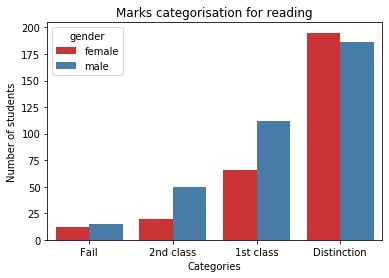

In [23]:
stuperf_df["Marks_Cats"]=pd.cut(stuperf_df['reading score'],interval,labels=categories)
ax=sns.countplot(x="Marks_Cats",hue="gender",palette="Set1",data=stuperf_df)
ax.set(title="Marks categorisation for reading",xlabel="Categories",ylabel="Number of students")
plt.show()

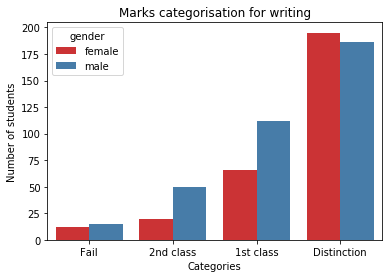

In [24]:
stuperf_df["Marks_Cats"]=pd.cut(stuperf_df['reading score'],interval,labels=categories)
ax=sns.countplot(x="Marks_Cats",hue="gender",palette="Set1",data=stuperf_df)
ax.set(title="Marks categorisation for writing",xlabel="Categories",ylabel="Number of students")
plt.show()